In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt

the image size is 768 1024


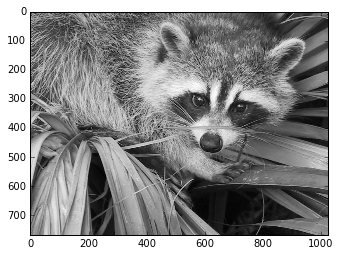

In [2]:
ref = misc.face(gray=True)
plt.imshow(ref, cmap=plt.cm.gray)
M,N=ref.shape
print 'the image size is', M, N

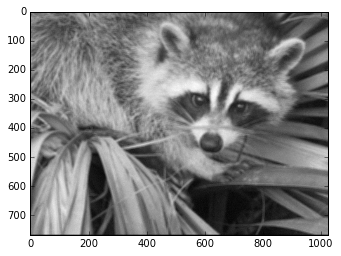

In [3]:
from scipy import ndimage
import numpy as np
ref = np.array(ref)
K=np.ones([9,9]) # average kernel
K=K/K.sum()
B = ndimage.convolve(ref, K, mode='constant') # blurred face
sigma=3
Bn = B+np.random.randn(M,N)*sigma # add Gaussian noise
plt.imshow(Bn, cmap=plt.cm.gray)

In [4]:
# calculate the gradient of 2D image
def grad(u):
    gradfx=np.zeros([M,N])
    gradfx[:M-1,:]=u[1:,:]
    gradfx[M-1,:]=u[M-1,:]
    gradfx=gradfx-u

    gradfy=np.zeros([M,N])
    gradfy[:,:N-1]=u[:,1:]
    gradfy[:,N-1]=u[:,N-1]
    gradfy=gradfy-u
    return gradfx, gradfy

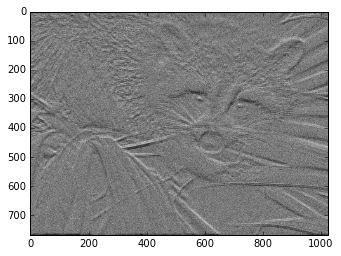

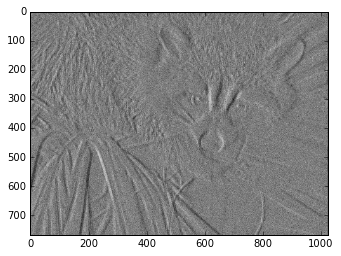

In [5]:
gradfx, gradfy=grad(Bn)
plt.imshow(gradfx,cmap=plt.cm.gray)
plt.figure()
plt.imshow(gradfy,cmap=plt.cm.gray)